In [1]:
import json
import hashlib
from datetime import datetime, timedelta

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from data_update.prepare_data import *

In [2]:
def make_timecuts(start: datetime, end: datetime, freq: str):
    date_range = pd.date_range(start=start, end=end, freq=freq)[:-1]
    df = pd.DataFrame(np.zeros((len(date_range), 2), dtype=int), columns=["Login", "Crud"], index=date_range)
    return df

In [3]:
json_path = "available_pushes_168hr.json"
with open(json_path, "r") as f:
    pushes = json.load(f)

In [7]:
idx = 16
pushes[idx]

{'pushTime': '2021-12-03 08:00:00',
 'game_id': '1572',
 'author': 'nan',
 'content': '뿅키가 도착했습니다!',
 'pushText': '(광고) 와우! 친구들, 뿅키를 받을 시간이야! (수신 거부 : 디바이스 내 설정 > 알림 설정)',
 'title': '뿅키가 도착했습니다!',
 'count_1': '1',
 'count_0': '0',
 'dataPoints_1': 34262,
 'dataPoints_0': 37546}

In [9]:
start_date = datetime.datetime.fromisoformat("2021-11-01")
end_date = datetime.datetime.fromisoformat("2021-12-31")

game_id = pushes[idx]["game_id"]
game_id = int(game_id) if isinstance(game_id, str) else game_id

In [10]:
login_df = prepare_login_df(
    url="http://ec2-13-125-225-205.ap-northeast-2.compute.amazonaws.com/push-data",
    start_date=start_date,
    end_date=end_date,
    save_path="./data",
    prefix="login",
)

Login data on 2021-11-01 already in ./data. Load the existing csv file.
Login data on 2021-11-02 already in ./data. Load the existing csv file.
Login data on 2021-11-03 already in ./data. Load the existing csv file.
Login data on 2021-11-04 already in ./data. Load the existing csv file.
Login data on 2021-11-05 already in ./data. Load the existing csv file.
Login data on 2021-11-06 already in ./data. Load the existing csv file.
Login data on 2021-11-07 already in ./data. Load the existing csv file.
Login data on 2021-11-08 already in ./data. Load the existing csv file.
Login data on 2021-11-09 already in ./data. Load the existing csv file.
Login data on 2021-11-10 already in ./data. Load the existing csv file.
Login data on 2021-11-11 already in ./data. Load the existing csv file.
Login data on 2021-11-12 already in ./data. Load the existing csv file.
Login data on 2021-11-13 already in ./data. Load the existing csv file.
Login data on 2021-11-14 already in ./data. Load the existing cs

In [11]:
login_df = login_df[login_df["game_id"] == game_id]

In [12]:
crud_df = prepare_crud_df(
    save_path='./data/crud',
    game_id=game_id,
)

CRUD data file (./data/crud/crud_1572.csv) exists. Load the existing csv file.


In [13]:
login_df["gamer_id"] = login_df["gamer_id"].apply(lambda x: hashlib.sha256(x.encode()).hexdigest())

In [14]:
login_df.head()

,gamer_id,game_id,inDate
16,52a490c524f808eceadc6dbe51295ba34787de2653d238...,1572,2021-11-01T09:00:04.000
18,8c8bd9ea794210c65b6485580c6a10cde993ca6b29565d...,1572,2021-11-01T09:00:05.000
20,4e5ab5a4720b360521da3f80d080154c060e5e47f618e3...,1572,2021-11-01T09:00:05.000
21,dbfe85caf0043a0a8cbf12349a7fc91a1c2f0f8bd3ca08...,1572,2021-11-01T09:00:05.000
31,52a490c524f808eceadc6dbe51295ba34787de2653d238...,1572,2021-11-01T09:00:11.000


In [15]:
crud_df.head()

,id,inDate,game_id,gamer_id
0,2,2021-12-02T19:06:46.070000Z,1572,59f200b5d7859e423709d78852d83c4b231f5393121897...
1,18,2021-12-02T19:06:46.094000Z,1572,91805cd387d8052ad93ad22a02beb25402e9663d7b1bd8...
2,27,2021-12-02T19:06:46.102000Z,1572,413dee0b52621f834386ab3671c8e2e8c50d826dcdcea8...
3,67,2021-12-02T19:06:46.148000Z,1572,925adb4f55cb7f6f40e9e483348479993cc409420a1ec7...
4,84,2021-12-02T19:06:46.172000Z,1572,fe2303895290afa5456c95d7fddafabf270a21879fb439...


In [16]:
columns = ["game_id", "gamer_id", "inDate"]

login_df = login_df[columns]
crud_df = crud_df[columns]

In [17]:
len(login_df), len(crud_df)

(1294091, 67628408)

In [18]:
login_df["type"] = "login"
crud_df["type"] = "crud"

In [19]:
login_df["inDate"] = pd.to_datetime(login_df["inDate"])

In [20]:
crud_df["inDate"] = crud_df["inDate"].apply(lambda x: x[:-1])
crud_df["inDate"] = pd.to_datetime(crud_df["inDate"])

In [21]:
login_df.head()

,game_id,gamer_id,inDate,type
16,1572,52a490c524f808eceadc6dbe51295ba34787de2653d238...,2021-11-01 09:00:04,login
18,1572,8c8bd9ea794210c65b6485580c6a10cde993ca6b29565d...,2021-11-01 09:00:05,login
20,1572,4e5ab5a4720b360521da3f80d080154c060e5e47f618e3...,2021-11-01 09:00:05,login
21,1572,dbfe85caf0043a0a8cbf12349a7fc91a1c2f0f8bd3ca08...,2021-11-01 09:00:05,login
31,1572,52a490c524f808eceadc6dbe51295ba34787de2653d238...,2021-11-01 09:00:11,login


In [22]:
crud_df.head()

,game_id,gamer_id,inDate,type
0,1572,59f200b5d7859e423709d78852d83c4b231f5393121897...,2021-12-02 19:06:46.070,crud
1,1572,91805cd387d8052ad93ad22a02beb25402e9663d7b1bd8...,2021-12-02 19:06:46.094,crud
2,1572,413dee0b52621f834386ab3671c8e2e8c50d826dcdcea8...,2021-12-02 19:06:46.102,crud
3,1572,925adb4f55cb7f6f40e9e483348479993cc409420a1ec7...,2021-12-02 19:06:46.148,crud
4,1572,fe2303895290afa5456c95d7fddafabf270a21879fb439...,2021-12-02 19:06:46.172,crud


In [24]:
data = pd.concat([login_df, crud_df], axis=0, ignore_index=True)
data = data.sort_values(["inDate", "gamer_id", "type"])
data = data.reset_index(drop=True)

In [25]:
data

,game_id,gamer_id,inDate,type
0,1572,52a490c524f808eceadc6dbe51295ba34787de2653d238...,2021-11-01 09:00:04,login
1,1572,4e5ab5a4720b360521da3f80d080154c060e5e47f618e3...,2021-11-01 09:00:05,login
2,1572,8c8bd9ea794210c65b6485580c6a10cde993ca6b29565d...,2021-11-01 09:00:05,login
3,1572,dbfe85caf0043a0a8cbf12349a7fc91a1c2f0f8bd3ca08...,2021-11-01 09:00:05,login
4,1572,52a490c524f808eceadc6dbe51295ba34787de2653d238...,2021-11-01 09:00:11,login
...,...,...,...,...
68922494,1572,382798b60d1553fe6f56a43514707b84dfcb6ecf4c28b5...,2021-12-31 23:59:22,login
68922495,1572,fb8e8584d53106649e5aee14b8dd5a77fa66d6ea71fcde...,2021-12-31 23:59:26,login
68922496,1572,e5de8bf239adb3eace5b04d7d015b4241bfd1b393e582e...,2021-12-31 23:59:30,login
68922497,1572,e5de8bf239adb3eace5b04d7d015b4241bfd1b393e582e...,2021-12-31 23:59:45,login


In [26]:
gamer_idx = 0
data[data["gamer_id"] == data.loc[gamer_idx, "gamer_id"]]

,game_id,gamer_id,inDate,type
0,1572,52a490c524f808eceadc6dbe51295ba34787de2653d238...,2021-11-01 09:00:04,login
4,1572,52a490c524f808eceadc6dbe51295ba34787de2653d238...,2021-11-01 09:00:11,login
58069,1572,52a490c524f808eceadc6dbe51295ba34787de2653d238...,2021-11-02 17:33:55,login
58073,1572,52a490c524f808eceadc6dbe51295ba34787de2653d238...,2021-11-02 17:34:02,login
83930,1572,52a490c524f808eceadc6dbe51295ba34787de2653d238...,2021-11-03 10:44:15,login
...,...,...,...,...
68885333,1572,52a490c524f808eceadc6dbe51295ba34787de2653d238...,2021-12-29 11:18:11,login
68901156,1572,52a490c524f808eceadc6dbe51295ba34787de2653d238...,2021-12-30 12:58:21,login
68901158,1572,52a490c524f808eceadc6dbe51295ba34787de2653d238...,2021-12-30 12:58:39,login
68914675,1572,52a490c524f808eceadc6dbe51295ba34787de2653d238...,2021-12-31 12:51:26,login


In [27]:
data = pd.concat([data, pd.get_dummies(data["type"])], axis=1)

In [28]:
data.head()

,game_id,gamer_id,inDate,type,crud,login
0,1572,52a490c524f808eceadc6dbe51295ba34787de2653d238...,2021-11-01 09:00:04,login,0,1
1,1572,4e5ab5a4720b360521da3f80d080154c060e5e47f618e3...,2021-11-01 09:00:05,login,0,1
2,1572,8c8bd9ea794210c65b6485580c6a10cde993ca6b29565d...,2021-11-01 09:00:05,login,0,1
3,1572,dbfe85caf0043a0a8cbf12349a7fc91a1c2f0f8bd3ca08...,2021-11-01 09:00:05,login,0,1
4,1572,52a490c524f808eceadc6dbe51295ba34787de2653d238...,2021-11-01 09:00:11,login,0,1


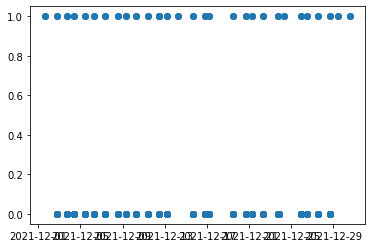

In [34]:
gamer_id = data.loc[gamer_idx, "gamer_id"]

subset = data[data["gamer_id"] == gamer_id]
subset = subset[(subset["inDate"] >= start_date + timedelta(days=30)) & (subset["inDate"] <= end_date)]
plt.plot(subset["inDate"], subset["login"], "o")

In [35]:
subset

,game_id,gamer_id,inDate,type,crud,login
827678,1572,52a490c524f808eceadc6dbe51295ba34787de2653d238...,2021-12-01 16:15:57.000,login,0,1
827680,1572,52a490c524f808eceadc6dbe51295ba34787de2653d238...,2021-12-01 16:16:12.000,login,0,1
2439035,1572,52a490c524f808eceadc6dbe51295ba34787de2653d238...,2021-12-02 18:32:43.000,login,0,1
2439078,1572,52a490c524f808eceadc6dbe51295ba34787de2653d238...,2021-12-02 18:32:43.596,crud,1,0
2439119,1572,52a490c524f808eceadc6dbe51295ba34787de2653d238...,2021-12-02 18:32:44.133,crud,1,0
...,...,...,...,...,...,...
67457256,1572,52a490c524f808eceadc6dbe51295ba34787de2653d238...,2021-12-28 15:24:29.291,crud,1,0
68885332,1572,52a490c524f808eceadc6dbe51295ba34787de2653d238...,2021-12-29 11:18:01.000,login,0,1
68885333,1572,52a490c524f808eceadc6dbe51295ba34787de2653d238...,2021-12-29 11:18:11.000,login,0,1
68901156,1572,52a490c524f808eceadc6dbe51295ba34787de2653d238...,2021-12-30 12:58:21.000,login,0,1
